<a href="https://colab.research.google.com/github/Ksenyff/AI/blob/main/Spiridonova_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
from sklearn.cluster import KMeans
import numpy as np


X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])
# загрузка массива в алгоритм К-средних, с распределением по 2-м кластерам
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

# предсказание отношения точек массива к кластерам
print(kmeans.labels_)
# предсказание отношения двух новых точек к колучившимся кластерам
print(kmeans.predict([[0, 0], [4, 4]]))
# координаты центра кластеров
kmeans.cluster_centers_

[1 0 1 0 0 0]
[1 0]


array([[3.25, 2.5 ],
       [1.  , 1.  ]])

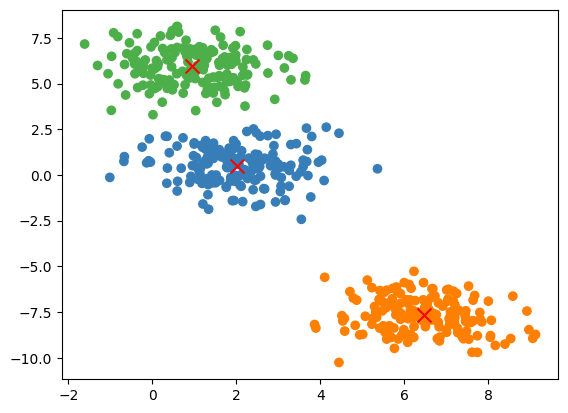

In [11]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

color = np.array(['#377eb8', '#ff7f00', '#4daf4a'])

# создание массива точек кластеров
# первая переменная - множество точек, второе - информация о принадлежности к тому или ионму кластеру
X_1, _ = make_blobs(n_samples=500, random_state=39)

# загрузка полученного множества в алгорит К-средних
kmeans = KMeans(n_clusters = 3).fit(X_1)

# результат работы алгоритма - массив принадлежностей точек кластерам
pred = kmeans.fit_predict(X_1)

# массив координат центров кластеров
centroids = kmeans.cluster_centers_

# отрисовка кластеров по цветам и их центров
plt.figure()
plt.scatter(X_1[:,0], X_1[:,1], c=color[pred])
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='x', s=100)


plt.show()

Text(0, 0.5, '$J(C_k)$')

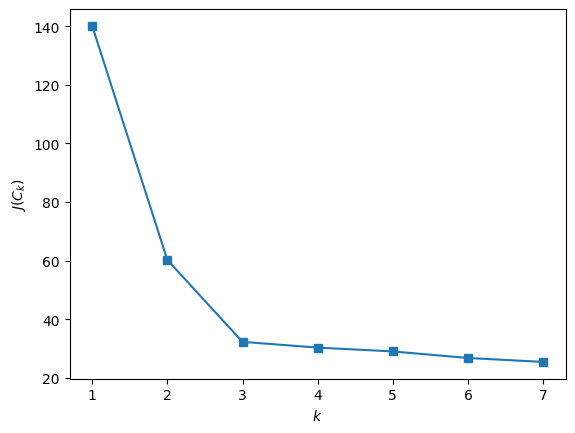

In [12]:
# массив для записи результата замеров среднего расстояния до центра кластеров относительно количества кластеров
inertia = []

# проверка по количеству кластеров от 1 до 8
for k in range(1,8):
    # загрузка множества точек в алгоритм К-средних с распределением по некоторому количеству кластеров
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_1)
    # заполнение данных о среднем расстоянии до центров кластеров
    inertia.append(np.sqrt(kmeans.inertia_))

# отрисовка полученного отношения
# на графике видно отсутствие резкого изменения расстояния после деления на три кластера,
# что говорит об оптимальности деления на три кластера для данной выборки
plt.plot(range(1,8), inertia, marker = 's')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

(500, 2)


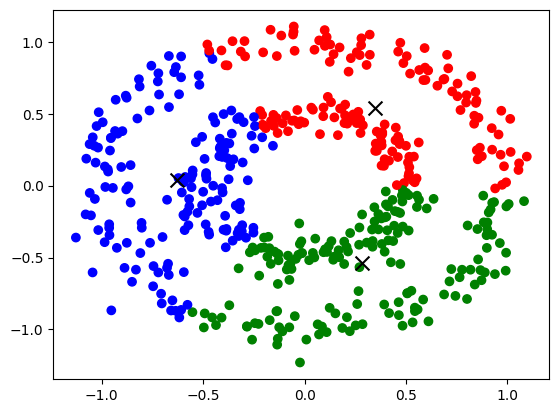

In [13]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt

color = np.array(['red', 'green', 'blue'])

# создание массива точек кластеров (круги)
# первая переменная - множество точек, второе - информация о принадлежности к тому или ионму кластеру
X_1, _ = make_circles(n_samples=500, factor=0.5, noise=0.08)

# вывод размерности массива
print(X_1.shape)

# загрузка множества точек в авлгоритм К-средних
kmeans = KMeans(n_clusters = 3).fit(X_1)

# получение данных о принадлежности точек кластерам
pred = kmeans.fit_predict(X_1)

# координаты центров кластеров
centroids = kmeans.cluster_centers_

# отрисовка распределения точек по кластерам
plt.figure()
plt.scatter(X_1[:,0], X_1[:,1], c=color[pred])
plt.scatter(centroids[:,0], centroids[:,1], c='black', marker='x', s=100)

# отображения полученного графика
plt.show()

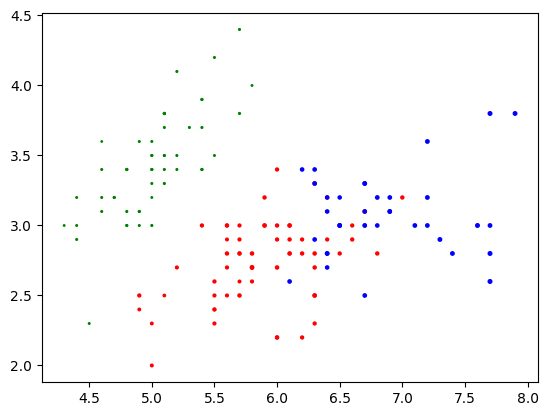

In [14]:
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D

# закрузка датасета с ирисами
iris = load_iris()
# массив точек ирисов
X = iris.data
# массив принадлежности ирисов сортам
y = iris.target

# загрузка ирисов в алгоритм К-средних
kmeans = KMeans(n_clusters = 3).fit(X)

# принадлежность точек кластерам на основе алгоритма К-средних
pred = kmeans.fit_predict(X)

# отрисовка полученных данных
fig = plt.figure()
ax = Axes3D(fig)
plt.scatter(X[:,0], X[:,1], X[:,2], c=color[pred])

# отобржение графика
plt.show()

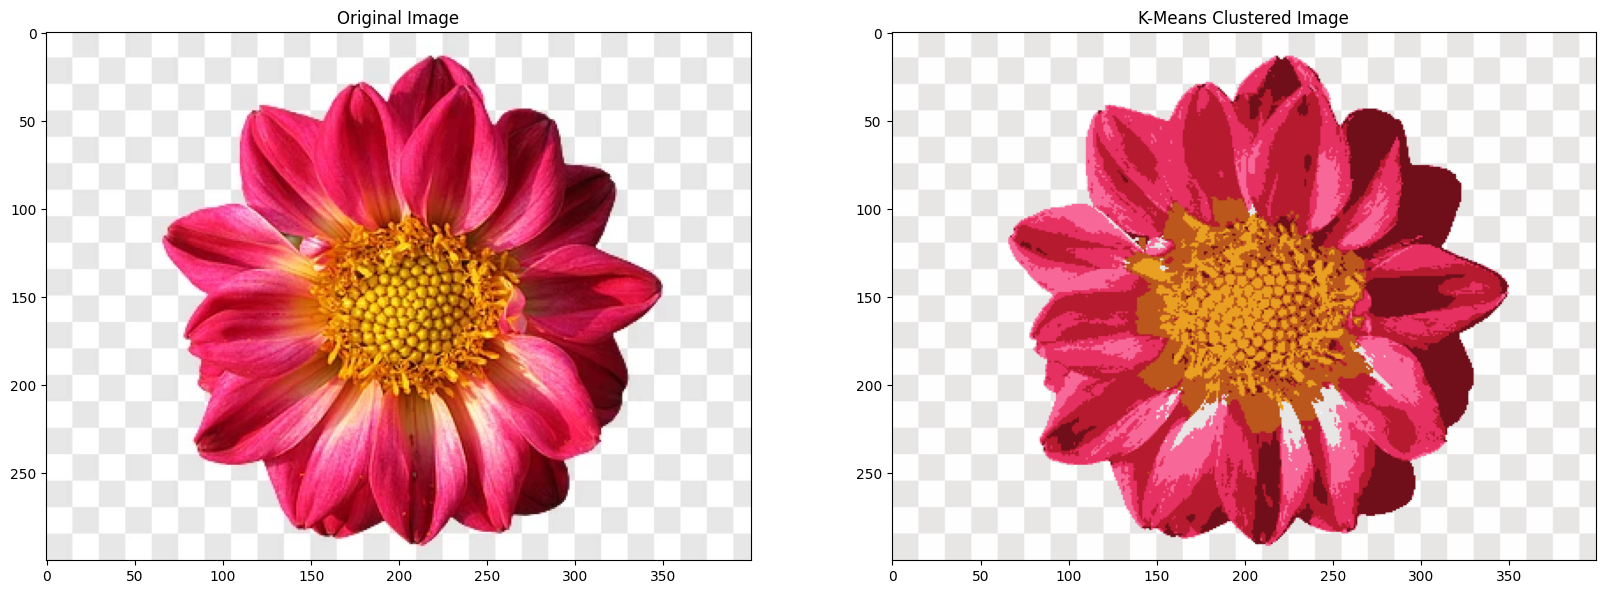

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from PIL import Image
import requests
from io import BytesIO
from skimage import color  # Для преобразования в L*a*b*

# Метод для подгрузки изображения по URL
def get_img(img_url, show=True):
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content))
    orig_img = np.array(img)  # Преобразование в NumPy массив (RGBA)

    if show:
        plt.imshow(orig_img)
        plt.title("Original Image")
        plt.show()
        print('Shape:', orig_img.shape)

    return orig_img

# Метод для обработки изображения с помощью метода К-средних
def get_kmeans(orig_img, n_colors=8):
    # Преобразование изображения в цветовое пространство L*a*b*
    lab_img = color.rgb2lab(orig_img[:, :, :3] / 255.0)  # Используем только RGB каналы

    # Формирование одномерного массива точек (пикселей) с 3 координатами (L*, a*, b*)
    X = lab_img.reshape((-1, 3))

    # Стандартизация данных (важно для корректной работы KMeans)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Обучение модели KMeans
    kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(X_scaled)
    pred = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_

    # Обратное преобразование центроидов в RGB
    centroids_rgb = color.lab2rgb(scaler.inverse_transform(centroids)) * 255
    centroids_rgb = np.clip(centroids_rgb, 0, 255).astype(np.uint8)

    # Восстановление изображения по центроидам
    new_lab = centroids_rgb[pred].reshape(orig_img.shape[0], orig_img.shape[1], 3)

    return new_lab

# Прямая ссылка на изображение
url = "https://img1.freepng.ru/20180203/hge/avirgpbf7.webp"

# Загрузка исходного изображения
orig_img = get_img(url, show=False)

# Обработка методом К-средних
new_img = get_kmeans(orig_img, n_colors=8)

# Сборка массива изображений
all_img = [orig_img, new_img]

# Отображение изображений
fig, axarr = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(20, 12))
axarr[0].imshow(all_img[0])
axarr[0].set_title("Original Image")
axarr[1].imshow(all_img[1])
axarr[1].set_title("K-Means Clustered Image")
plt.show()

In [5]:
# некоторый массив точек
l1 = np.array([[1,3],[5,3],[2,7],[2,6],[2,8],[3,9],[4,6],[8,3]])

[[2.        6.6      ]
 [5.6666665 4.       ]]
[[2.3333333 6.5      ]
 [6.5       3.       ]]
[[2.3333333 6.5      ]
 [6.5       3.       ]]


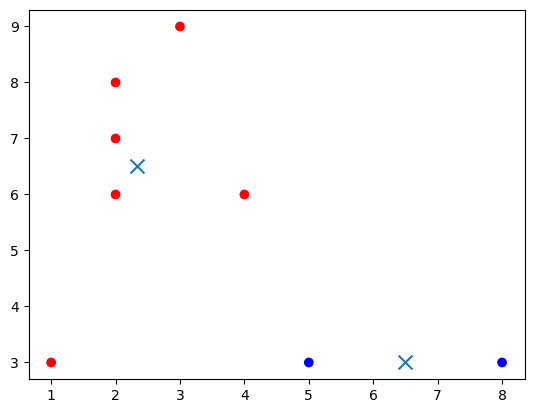

In [47]:
# класс для реализации алгоритма К-средних
class K_Means():

    def __init__(self, dataset, n_clusters = 3):
        # определение необходимы полей
        # заданное множество точек
        self.dataset = dataset
        # количество кластеров на которые будет делиться множество
        self.n_clusters = n_clusters
        # максимальное количество итераций для пересчета кластеров
        self.max_n_iter = 10
        # минимальный шаг для определения эффективности кластеризации
        # (если на некотором шаге кластеризации разница в среднем расстоянии до центров меньше этого значения, процесс кластеризации завершается)
        self.tolerance = .01
        # флаг для определения кластеризовано ли множество
        self.fitted = False
        # массив соответствия множества кластерам
        self.labels = np.array([])
        # массив центров кластеров
        self.centroids = np.array([self.dataset[k] for k in range(self.n_clusters)], dtype ='f')

    # рассчет расстояния между точками
    def get_dist2(self, list1, list2):
        return sum((i-j)**2 for i,j in zip(list1, list2))

    # метод для перераспределения точек относительно центроа
    def distribute_data(self):
        self.labels = np.array([])
        # для каждого элемента
        for elem in self.dataset:
            # расчитываются расстояния до центров кластеров
            dist2 = [self.get_dist2(elem, center) for center in self.centroids]
            # находится ближайший центр кластера
            idx = dist2.index(min(dist2))
            # элементу присваивается номер кластера
            self.labels = np.append(list(self.labels), idx).astype(int)

    # метод для перерасчета центра кластера
    def recalculate_centroids(self):
        # для каждого кластера
        for i in range(self.n_clusters):
            num = 0
            temp = np.zeros(self.dataset[0].shape)
            # для каждого элемента множества
            for k, label in enumerate(self.labels):
                # если номер кластера элемента совпадает с искомым
                if label == i:
                    # считается сумма координат
                    temp = temp + self.dataset[k]
                    # и увеличивается количество точек в кластере
                    num += 1
            # сумма координат точек в кластере делится на количество точек и получается новый центр кластера
            self.centroids[i] = temp / num
        print(self.centroids)

    # метода кластеризации
    def fit(self):
        iter=1
        # пока количество итераций не превышает заданный максимум
        while iter < self.max_n_iter:
            # сохраняем имеющиеся центроиды
            prev_centroids = np.copy(self.centroids)
            # делаем перераспределение элементов по кластерам
            self.distribute_data()
            # перерасчитываем центры кластеров
            self.recalculate_centroids()
            # если шаг среднего расстояния до центров меньше заданного, то заканчиваем процесс кластеризации
            if max([self.get_dist2(i,k) for i,k in zip(self.centroids, prev_centroids)]) < self.tolerance:
                break
            # увеличиваем счетчик итераций
            iter += 1
        # указываем что множество кластеризовано
        self.fitted = True

    # метод для предсказания принадлежности некоторой точки кластеру
    def predict(self, data):
        if self.fitted:
            # поиск расстояния от новой точки до центра кластеров
            dist2= [self.get_dist2(data, center) for center in self.centroids]
            # возвращаем индекс кластера, чей центр находится ближе всего
            return dist2.index(min(dist2))


test = K_Means(l1, 2)

test.distribute_data()
test.recalculate_centroids()
test.fit()
test.predict([0,4])

plt.figure()
plt.scatter(test.dataset[:,0], test.dataset[:,1], c=color[test.labels])
plt.scatter(test.centroids[:,0], test.centroids[:,1], marker='x', s=100)
plt.show()

ДЗ!!

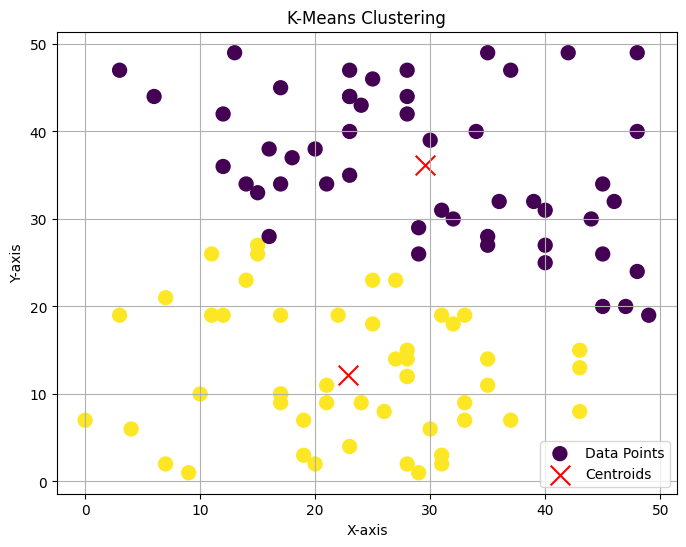

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Рандомные точки
l1 = np.random.randint(low=0, high=50, size=(100, 2))

class K_Means:
    def __init__(self, dataset, n_clusters=3, distance_metric='euclidean_squared'):
        self.dataset = dataset
        self.n_clusters = n_clusters
        self.max_n_iter = 10
        self.tolerance = 0.01
        self.fitted = False
        self.labels = np.array([])
        self.distance_metric = distance_metric

        # Случайная инициализация центров кластеров
        random_indices = np.random.choice(len(self.dataset), self.n_clusters, replace=False)
        self.centroids = self.dataset[random_indices].astype('f')

    def get_dist(self, a, b):
        # Поддержка разных метрик расстояния
        if self.distance_metric == 'euclidean':
            return np.sqrt(np.sum((a - b) ** 2))
        elif self.distance_metric == 'euclidean_squared':
            return np.sum((a - b) ** 2)
        elif self.distance_metric == 'manhattan':
            return np.sum(np.abs(a - b))
        else:
            raise ValueError("Unsupported distance metric")

    def distribute_data(self):
        # Распределение точек по кластерам на основе расстояния
        self.labels = []
        for elem in self.dataset:
            distances = [self.get_dist(elem, center) for center in self.centroids]
            self.labels.append(np.argmin(distances))
        self.labels = np.array(self.labels)

    def recalculate_centroids(self):
        # Пересчёт центров кластеров [[5]]
        new_centroids = []
        for i in range(self.n_clusters):
            cluster_points = self.dataset[self.labels == i]
            if len(cluster_points) > 0:
                new_centroids.append(np.mean(cluster_points, axis=0))
            else:
                # Если кластер пустой — оставляем старый центр
                new_centroids.append(self.centroids[i])
        self.centroids = np.array(new_centroids)

    def fit(self):
        # Основной процесс кластеризации
        iter_count = 0
        while iter_count < self.max_n_iter:
            prev_centroids = np.copy(self.centroids)
            self.distribute_data()
            self.recalculate_centroids()

            # Проверка на сходимость
            max_shift = max(self.get_dist(c1, c2) for c1, c2 in zip(prev_centroids, self.centroids))
            if max_shift < self.tolerance:
                break
            iter_count += 1
        self.fitted = True

        # Автоматическое отображение результата
        if self.dataset.shape[1] <= 2 and self.n_clusters < 10:
            plt.figure(figsize=(8, 6))
            plt.scatter(self.dataset[:, 0], self.dataset[:, 1], c=self.labels, cmap='viridis', s=100, label='Data Points')
            plt.scatter(self.centroids[:, 0], self.centroids[:, 1], marker='x', s=200, c='red', label='Centroids')
            plt.title('K-Means Clustering')
            plt.xlabel('X-axis')
            plt.ylabel('Y-axis')
            plt.legend()
            plt.grid(True)
            plt.show()

    def predict(self, data_point):
        # Предсказание кластера для новой точки
        if not self.fitted:
            raise Exception("Model is not fitted yet")
        distances = [self.get_dist(data_point, center) for center in self.centroids]
        return np.argmin(distances)

# Пример использования
if __name__ == "__main__":
    test = K_Means(l1, n_clusters=2, distance_metric='euclidean')
    test.fit()


In [ ]:
# Домашнее задание: Дополнить написанный ранее класс с алгоритмом KMeans() так чтобы:
# 1) на первом шаге центры кластеров были случайными элементами (подсказка: сейчас это первые элементы множества)
# 2) Добавить автоматическое отображение результата кластеризации в случае если у элементов множества
#   менее или ровно 2 признака(координат) и указано меньше 10 кластеров для поиска (подсказка: можно добавить отображение
# в конце метода fit())
# 3) Добавьте возможность просчета расстояния с помощью разных методов - минимум 3 (подсказка: методы можно подглядеть
# в презентации)